# Загрузка данных и библиотек


In [1]:
# Загрузка библиотек
import pandas as pd  # Для работы с данными в виде таблиц (DataFrame), удобное манипулирование и анализ данных
import numpy as np  # Для выполнения числовых операций, работа с массивами и матрицами
import matplotlib.pyplot as plt  # Для построения графиков и визуализации данных
from sklearn.model_selection import train_test_split  # Для разделения данных на обучающую и тестовую выборки
from sklearn.feature_extraction.text import TfidfVectorizer  # Для преобразования текстов в векторы с использованием TF-IDF метода (важность слов)
from keras.models import Sequential  # Для создания и обучения последовательных нейронных сетей
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional  # Для добавления слоев в нейронную сеть (LSTM для работы с последовательностями, Dense — полносвязный слой, Dropout — регуляризация)
import keras  # Основной модуль для работы с нейронными сетями (в частности, TensorFlow/Keras API)
import keras_tuner as kt  # Модуль для автоматического подбора гиперпараметров модели (например, количество нейронов, слоев и т.д.)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Метрики для оценки качества регрессионной модели (средняя абсолютная ошибка, средняя квадратичная ошибка, коэффициент детерминации)
from keras.preprocessing.sequence import pad_sequences  # Для выравнивания последовательностей (например, для обработки текстов переменной длины перед подачей в нейронную сеть)
from datetime import datetime  # Для работы с датами и временем (например, для отметки времени, преобразования форматов дат)
import seaborn as sns  # Для создания статистических графиков и визуализаций (альтернатива Matplotlib с более красивыми и понятными графиками)
from sklearn.feature_extraction.text import CountVectorizer  # Для преобразования текстов в векторы с использованием подсчета частоты слов
from catboost import CatBoostRegressor  # Модель машинного обучения (градиентный бустинг для регрессии), эффективна для табличных данных
from datetime import datetime, timedelta  # Для работы с датами и интервалами времени
from io import StringIO  # Модуль для работы с текстовыми потоками (например, для чтения данных в формате CSV из строки)
import requests  # Модуль для отправки HTTP-запросов (например, для получения данных из веб-ресурсов)
from selenium import webdriver  # Для автоматизации работы с браузером
from selenium.webdriver.common.keys import Keys  # Для симуляции нажатий клавиш
from selenium.webdriver.common.by import By  # Для поиска элементов на веб-страницах
from time import sleep  # Для добавления задержек в скриптах
from tqdm import tqdm  # Для отображения прогресс-баров
from sklearn.preprocessing import LabelEncoder  # Для кодирования категориальных меток
import time  # Модуль для работы со временем (например, для пауз в выполнении кода или отметки времени)
from collections import Counter  # Для подсчета частоты элементов в списках или других итерируемых объектах
from tqdm.notebook import tqdm  # Для создания прогресс-баров в циклах (например, чтобы отслеживать выполнение долгих операций)
from bs4 import BeautifulSoup  # Для парсинга HTML и XML страниц (например, для извлечения данных с веб-страниц)
import warnings  # Модуль для управления предупреждениями (например, для отключения ненужных предупреждений)
warnings.filterwarnings("ignore")  # Игнорирование предупреждений (чтобы не засорять вывод ненужными сообщениями)

# Просмотр и анализ первоначальные данные

In [2]:
# Загрузка обучающих данных
train = pd.read_csv('train.csv', sep=';')
news = pd.read_csv('news.csv')

In [3]:
# Загрузка тестовых данных
test = pd.read_csv('test.csv', sep=';')

In [4]:
# вывод тренировочного датафрейма
train

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL
0,VKCO,1,2024-02-01,10:00:00,698.20,698.20,696.20,696.60,7099
1,VKCO,1,2024-02-01,10:01:00,696.60,698.00,696.00,698.00,7629
2,VKCO,1,2024-02-01,10:02:00,697.60,697.60,695.80,696.60,5726
3,VKCO,1,2024-02-01,10:03:00,696.40,696.80,695.80,695.80,3972
4,VKCO,1,2024-02-01,10:04:00,695.80,696.00,695.00,695.20,5956
...,...,...,...,...,...,...,...,...,...
434784,SIBN,1,2024-05-10,23:45:00,751.50,751.55,751.50,751.55,44
434785,SIBN,1,2024-05-10,23:46:00,751.55,751.70,751.00,751.20,1996
434786,SIBN,1,2024-05-10,23:47:00,751.20,751.25,751.00,751.00,801
434787,SIBN,1,2024-05-10,23:48:00,751.00,751.00,750.95,751.00,230


In [5]:
# вывод тестового датафрейма
test

,TICKER,DATE,TIME
0,CHMF,2024-06-07,10:00:00
1,CHMF,2024-06-07,11:00:00
2,CHMF,2024-06-07,12:00:00
3,CHMF,2024-06-07,13:00:00
4,CHMF,2024-06-07,14:00:00
...,...,...,...
2125,SBER,2024-06-10,18:00:00
2126,SBER,2024-06-10,20:00:00
2127,SBER,2024-06-10,21:00:00
2128,SBER,2024-06-10,22:00:00


In [6]:
# вывод датафрейма с новостями
news

,title,created_at,source,url,content
0,ЦБ Армении снизил ставку рефинансирования до 8...,2024-04-30 08:49:25+00:00,TradingView,https:\/\/ru.tradingview.com\/news\/reuters.co...,"Центробанк Армении сообщил во вторник, что сни..."
1,"Рынок акций США закрылся падением, Dow Jones ...",2024-05-23 20:30:00+00:00,Investing,https:\/\/ru.investing.com\/news\/stock-market...,Investing.com – Фондовый рынок США завершил то...
2,Активность в промпроизводстве КНР в апр росла ...,2024-04-30 06:43:27+00:00,TradingView,https:\/\/ru.tradingview.com\/news\/reuters.co...,Активность в промышленном секторе Китая в апре...
3,"Рынок акций США закрылся ростом, Dow Jones пр...",2024-06-05 20:30:00+00:00,Investing,https:\/\/ru.investing.com\/news\/stock-market...,Investing.com – Фондовый рынок США завершил то...
4,Активность в секторе услуг КНР замедлила рост ...,2024-04-30 06:39:27+00:00,TradingView,https:\/\/ru.tradingview.com\/news\/reuters.co...,Деловая активность в секторе услуг Китая снизи...
...,...,...,...,...,...
4146,РФ начала регулярный выкуп алмазов Алросы в го...,2024-03-28 17:29:12+00:00,TradingView,https:\/\/ru.tradingview.com\/news\/reuters.co...,Российский Минфин подтвердил договоренность о ...
4147,"У FTX остались токены Solana на $7,5 млрд. Кто...",2024-03-28 17:21:42+00:00,TradingView,https:\/\/ru.tradingview.com\/news\/rbc_crypto...,Покупка 41 млн токенов Solana (SOL) у биржи-ба...
4148,Покупка этих альткоинов сейчас равносильна пок...,2024-06-08 15:03:24+00:00,Investing,https:\/\/ru.investing.com\/news\/cryptocurren...,"Happycoin.club - Cобытия, которые сейчас проис..."
4149,Золото скорректируется к $2200–2300 за унцию в...,2024-05-20 12:00:00+00:00,Finam,https:\/\/www.finam.ru\/publications\/item\/zo...,Торги 17 мая на американских фондовых биржах х...


In [ ]:
# смотрим трен рядов
import matplotlib.pyplot as plt
df = df1
plt.figure(figsize=(14, 7))
plt.plot(df['CLOSE'], label='Close Price', color='blue')
plt.title('Close Price Trend')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [7]:
# Выводим все тикеры с их количеством в данных
Counter(train.TICKER)

Counter({'SBER': 55775,
         'CHMF': 55531,
         'VKCO': 55120,
         'YNDX': 55094,
         'MTSS': 54495,
         'SIBN': 54052,
         'SMLT': 53290,
         'AGRO': 51432})

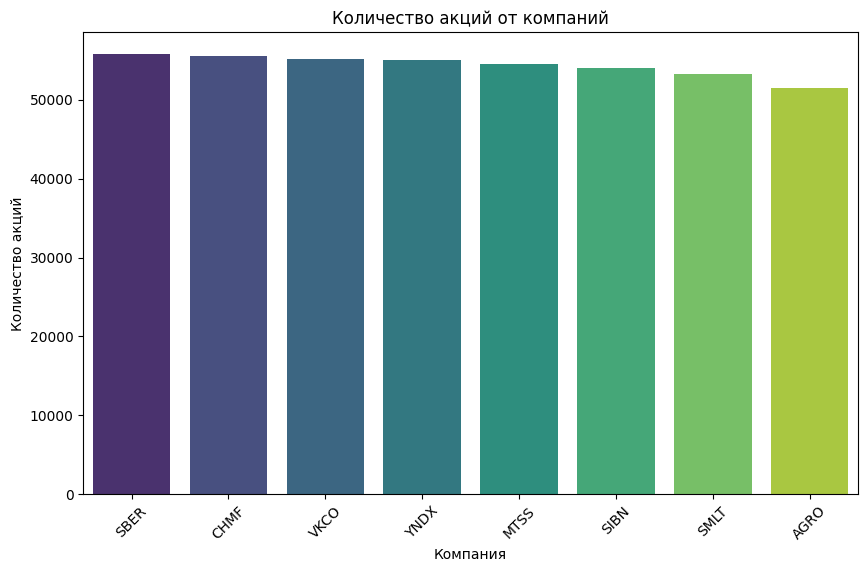

In [8]:
#построим график зависимости количества акций от компаний

# Считаем количество акций от каждой компании
source_counts = train['TICKER'].value_counts().reset_index()
source_counts.columns = ['TICKER', 'count']

# Строим график с использованием seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='TICKER', y='count', data=source_counts, palette='viridis')
plt.xlabel('Компания')
plt.ylabel('Количество акций')
plt.title('Количество акций от компаний')
plt.xticks(rotation=45)  # Поворот меток на оси X для лучшей читаемости
plt.show()

In [ ]:
# смотрим шум, тренд, сезонность
from statsmodels.tsa.seasonal import seasonal_decompose

# Декомпозиция временного ряда (модель аддитивная, период указывается в зависимости от данных)
result = seasonal_decompose(df['CLOSE'], model='additive', period=365)

# Построение графиков
result.plot()
plt.show()

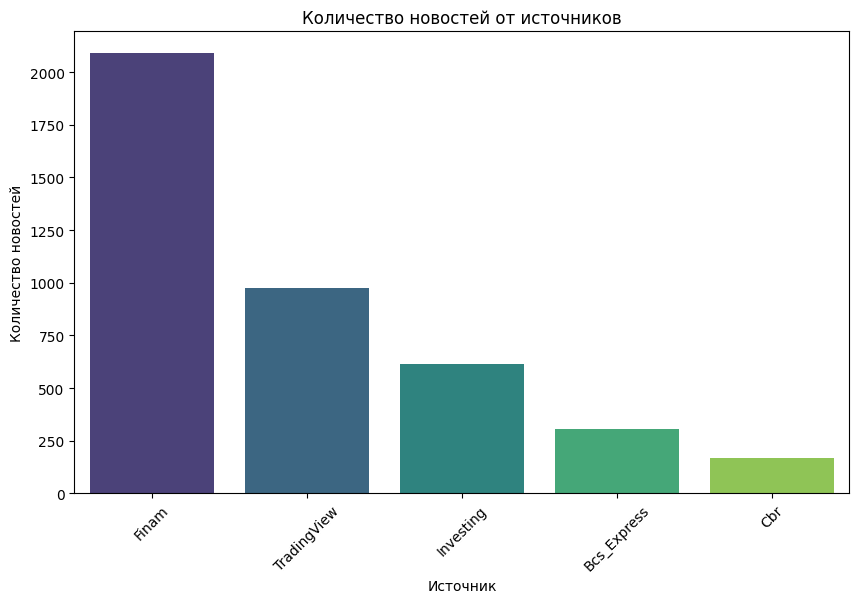

In [9]:
#построим график зависимости количества новостей от источника

# Считаем количество новостей от каждого источника
source_counts = news['source'].value_counts().reset_index()
source_counts.columns = ['source', 'count']

# Строим график с использованием seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='source', y='count', data=source_counts, palette='viridis')
plt.xlabel('Источник')
plt.ylabel('Количество новостей')
plt.title('Количество новостей от источников')
plt.xticks(rotation=45)  # Поворот меток на оси X для лучшей читаемости
plt.show()

Большинство новостей в данном нам первоначальном датасете с сайта Finam, поэтому при парсинге новостей для дополненого датасета будем использовать именно этот сайт.

In [ ]:
# смотрим график автокореляции
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

MAX_LAGS = 100  # Ограничиваем количество лагов
USE_FFT = True  # Включить FFT для ускорения

# График автокорреляции с оптимизациями
plt.figure(figsize=(10, 5))
plot_acf(df['CLOSE'], lags=MAX_LAGS, fft=USE_FFT, alpha=0.05)
plt.title('Optimized Autocorrelation of Close Price')
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

ts = df1['CLOSE']  

# ADF тест


sample_rate = 10  # Можно увеличить для большей скорости, например 100, 1000
ts_sampled = ts[::sample_rate] # Берем каждый sample_rate-й элемент

# ADF тест на выборке
result_sampled = adfuller(ts_sampled.dropna())
print('ADF Statistic (sampled):', result_sampled[0])
print('p-value (sampled):', result_sampled[1])
print('Critical Values (sampled):')
for key, value in result_sampled[4].items():
    print(f'\t{key}: {value}')

if result_sampled[1] > 0.05:
    print('Ряд не стационарен (принимаем H0) - на выборке')
else:
    print('Ряд стационарен (отвергаем H0) - на выборке')

if result_sampled[0] > result_sampled[4]['5%']:
    print('Единичные корни присутствуют - ряд не стационарен - на выборке')
else:
    print('Единичных корней нет - ряд стационарен - на выборке')

# Парсинг дополнительных данных

In [10]:
# Инициализируем данные для работы парсеров
symbols = ['AGRO', 'CHMF', 'MTSS', 'SBER', 'SIBN', 'SMLT', 'VKCO', 'YDEX'] # Обозначаем список всех тикеров
from_date = datetime(2024, 1, 1, 10, 0, 0) # Устанавливаем начальную дату
#to_date = datetime.datetime.today()
to_date = datetime(2024, 9, 30, 23, 59, 0) # Устанавливаем конечную дату
interval = 1 # Устанавливаем интервал между свечами в минутах

## Заполнение пропусков данных

In [11]:
# Создание функции для заполнения пропусков в данных при парсинге
def fill_data(data, from_date, to_date, interval):
    data['begin'] = pd.to_datetime(data['begin'])
    data['end'] = pd.to_datetime(data['end'])
    data = data[data['begin'].apply(lambda x: x.hour >= 10)]
    search_data = set(data['begin'])
    while from_date <= to_date:
        if from_date.hour < 10:
            pass
        elif from_date not in search_data:
            row = data[data['begin'] == (from_date - timedelta(minutes=1))]
            if len(row) == 1:
                search_data.add(from_date)
                close = row.iloc[0]['close']
                data = pd.concat([data, pd.DataFrame({
                    'open': [close],
                    'close': [close],
                    'high': [close],
                    'low': [close],
                    'value': [0],
                    'volume': [0],
                    'begin': [from_date],
                    'end': [from_date + timedelta(seconds=59)]
                })])
        from_date += timedelta(minutes=1)
    data = data.sort_values(by='begin').reset_index(drop=True)
    return data

## Парсинг курса юаня к рублю 

In [13]:
# Создание функции для парсинга курса юаня
def get_currency_data(symbol, from_date, to_date, interval):
    api_url = f"https://iss.moex.com/iss/engines/currency/markets/selt/securities//{symbol}_TOM/candles.csv"
    all_data = []
    start = 0
    while True:
        params = {
            'from': from_date,
            'till': to_date,
            'interval': interval,
            'start': start,
        }
        response = requests.get(api_url, params=params)
        data = pd.read_csv(StringIO(response.text), sep=';', skiprows=1)
        all_data.append(data)
        if len(data) < 500:
            break
        start += 500
    return pd.concat(all_data).reset_index(drop=True)

# Парсинг курса юаня
symbol = 'CNYRUB'
data = get_currency_data(symbol, from_date, to_date, interval)
print(f'{symbol}: {len(data)} rows')
data = fill_data(data, from_date, to_date, interval)
data.to_csv(f"{symbol}.csv", index=False)
data

CNYRUB: 119503 rows


,open,close,high,low,value,volume,begin,end
0,12.6800,12.6800,12.6810,12.6795,228711716.5,18037000,2024-01-03 10:00:00,2024-01-03 10:00:59
1,12.6800,12.6800,12.6810,12.6795,79718974.5,6287000,2024-01-03 10:01:00,2024-01-03 10:01:59
2,12.6800,12.6795,12.6800,12.6765,54328512.0,4285000,2024-01-03 10:02:00,2024-01-03 10:02:59
3,12.6795,12.6785,12.6795,12.6785,8773914.0,692000,2024-01-03 10:03:00,2024-01-03 10:03:59
4,12.6785,12.6800,12.6805,12.6785,33398887.0,2634000,2024-01-03 10:04:00,2024-01-03 10:04:59
...,...,...,...,...,...,...,...,...
159595,13.2400,13.2400,13.2400,13.2400,0.0,0,2024-09-30 23:55:00,2024-09-30 23:55:59
159596,13.2400,13.2400,13.2400,13.2400,0.0,0,2024-09-30 23:56:00,2024-09-30 23:56:59
159597,13.2400,13.2400,13.2400,13.2400,0.0,0,2024-09-30 23:57:00,2024-09-30 23:57:59
159598,13.2400,13.2400,13.2400,13.2400,0.0,0,2024-09-30 23:58:00,2024-09-30 23:58:59


## Парсинг IMOEX2

In [14]:
# Создание функции для парсинга Индекса Моссковской биржи
def get_index_data(symbol, from_date, to_date, interval):
    api_url = f"https://iss.moex.com/iss/engines/stock/markets/index/securities/{symbol}/candles.csv"
    all_data = []
    start = 0
    while True:
        params = {
            'from': from_date,
            'till': to_date,
            'interval': interval,
            'start': start,
        }
        response = requests.get(api_url, params=params)
        data = pd.read_csv(StringIO(response.text), sep=';', skiprows=1)
        all_data.append(data)
        if len(data) < 500:
            break
        start += 500
    return pd.concat(all_data).reset_index(drop=True)

# Парсинг Индекса Московской биржи
symbol = 'IMOEX2'
data = get_index_data(symbol, from_date, to_date, interval)
print(f'{symbol}: {len(data)} rows')
data = fill_data(data, from_date, to_date, interval)
data.to_csv(f"{symbol}.csv", index=False)
data

IMOEX2: 153420 rows


,open,close,high,low,value,volume,begin,end
0,3099.78,3099.95,3100.55,3099.10,3.232272e+08,0,2024-01-03 10:00:00,2024-01-03 10:00:59
1,3100.24,3100.91,3100.91,3099.61,1.053771e+08,0,2024-01-03 10:01:00,2024-01-03 10:01:59
2,3100.81,3102.54,3102.55,3100.65,1.647119e+08,0,2024-01-03 10:02:00,2024-01-03 10:02:59
3,3102.66,3104.13,3104.47,3102.62,1.635453e+08,0,2024-01-03 10:03:00,2024-01-03 10:03:59
4,3104.23,3106.06,3106.30,3104.23,2.317632e+08,0,2024-01-03 10:04:00,2024-01-03 10:04:59
...,...,...,...,...,...,...,...,...
159595,2829.02,2829.02,2829.02,2829.02,0.000000e+00,0,2024-09-30 23:55:00,2024-09-30 23:55:59
159596,2829.02,2829.02,2829.02,2829.02,0.000000e+00,0,2024-09-30 23:56:00,2024-09-30 23:56:59
159597,2829.02,2829.02,2829.02,2829.02,0.000000e+00,0,2024-09-30 23:57:00,2024-09-30 23:57:59
159598,2829.02,2829.02,2829.02,2829.02,0.000000e+00,0,2024-09-30 23:58:00,2024-09-30 23:58:59


## Парсинг новостей для дополненного датасета

In [17]:
# Парсинг времени выхода новостей с сайта Finam
driver = webdriver.Chrome()
driver.get("https://www.finam.ru/publications/section/market/date/2024-01-01/2024-10-01/")

while True:
    try:
        driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.PAGE_DOWN)
        driver.find_element(By.CSS_SELECTOR, '[data-id="button-more"]').click()
        sleep(1)
    except Exception as e:
        if str(e).startswith('Message: element not interactable'):
            break

links = [link for element in tqdm(driver.find_elements(By.CLASS_NAME, 'mb2x')) if 
         (link:=element.find_element(By.TAG_NAME, 'a').get_attribute('href')).startswith('https://www.finam.ru/publications/item/')]
links[0], links[-1]

dates = [datetime.strptime(''.join(link.rstrip('/').split('-')[-2:]), '%Y%m%d%H%M') for link in links]
dates[0], dates[-1]

df = pd.DataFrame({'datetime': dates})
df.to_csv('new_news.csv', index=False)
df

,datetime
0,2024-10-01 19:23:00
1,2024-10-01 19:00:00
2,2024-10-01 18:56:00
3,2024-10-01 17:10:00
4,2024-10-01 16:49:00
...,...
7227,2024-01-02 14:00:00
7228,2024-01-02 12:00:00
7229,2024-01-02 10:00:00
7230,2024-01-01 16:00:00


## Парсинг акций по всем тикерам

In [18]:
# Создание функции для парсинга акций по всем тикерам
def get_shares_data(symbol, from_date, to_date, interval):
    api_url = f"https://iss.moex.com/iss/engines/stock/markets/shares/securities/{symbol}/candles.csv"
    all_data = []
    start = 0
    while True:
        params = {
            'from': from_date,
            'till': to_date,
            'interval': interval,
            'start': start,
        }
        response = requests.get(api_url, params=params)
        data = pd.read_csv(StringIO(response.text), sep=';', skiprows=1)
        all_data.append(data)
        if len(data) < 500:
            break
        start += 500
    return pd.concat(all_data).reset_index(drop=True)

# Парсинг акций по всем тикерам
for symbol in tqdm(symbols):
    data = get_shares_data(symbol, from_date, to_date, interval)
    print(f'{symbol}: {len(data)} rows')
    data = fill_data(data, from_date, to_date, interval)
    data.to_csv(f"{symbol}.csv", index=False)
data

  0%|          | 0/8 [00:00<?, ?it/s]

AGRO: 136719 rows
CHMF: 153145 rows
MTSS: 150782 rows
SBER: 154010 rows
SIBN: 150330 rows
SMLT: 144662 rows
VKCO: 152441 rows
YDEX: 39698 rows


,open,close,high,low,value,volume,begin,end
0,4541.0,4412.0,4542.0,4404.0,237129868.0,53081,2024-07-24 10:00:00,2024-07-24 10:00:59
1,4408.0,4399.5,4425.5,4352.0,307752385.5,70136,2024-07-24 10:01:00,2024-07-24 10:01:59
2,4399.5,4336.5,4426.5,4333.5,330119237.5,75413,2024-07-24 10:02:00,2024-07-24 10:02:59
3,4337.0,4385.0,4396.5,4335.0,179073336.5,41064,2024-07-24 10:03:00,2024-07-24 10:03:59
4,4386.0,4408.0,4414.0,4375.5,191174320.0,43454,2024-07-24 10:04:00,2024-07-24 10:04:59
...,...,...,...,...,...,...,...,...
41155,4007.5,4007.5,4007.5,4007.5,0.0,0,2024-09-30 23:55:00,2024-09-30 23:55:59
41156,4007.5,4007.5,4007.5,4007.5,0.0,0,2024-09-30 23:56:00,2024-09-30 23:56:59
41157,4007.5,4007.5,4007.5,4007.5,0.0,0,2024-09-30 23:57:00,2024-09-30 23:57:59
41158,4007.5,4007.5,4007.5,4007.5,0.0,0,2024-09-30 23:58:00,2024-09-30 23:58:59


In [19]:
# Парсинг данных по старому тикеру Яндекса 
for symbol in tqdm(['YNDX']):
    data = get_shares_data(symbol, from_date, to_date, interval)
    print(f'{symbol}: {len(data)} rows')
    data = fill_data(data, from_date, to_date, interval)
    data.to_csv(f"{symbol}.csv", index=False)
data

  0%|          | 0/1 [00:00<?, ?it/s]

YNDX: 91557 rows


,open,close,high,low,value,volume,begin,end
0,2550.0,2559.2,2560.0,2542.0,14266688.2,5584,2024-01-03 10:00:00,2024-01-03 10:00:59
1,2559.0,2558.6,2559.4,2553.2,8003879.4,3130,2024-01-03 10:01:00,2024-01-03 10:01:59
2,2557.8,2557.6,2557.8,2554.0,6458054.8,2526,2024-01-03 10:02:00,2024-01-03 10:02:59
3,2557.6,2570.0,2570.0,2557.2,20290761.8,7920,2024-01-03 10:03:00,2024-01-03 10:03:59
4,2570.0,2587.4,2588.0,2569.8,61602052.6,23890,2024-01-03 10:04:00,2024-01-03 10:04:59
...,...,...,...,...,...,...,...,...
95755,4071.2,4071.2,4071.2,4071.2,0.0,0,2024-06-14 23:55:00,2024-06-14 23:55:59
95756,4071.2,4071.2,4071.2,4071.2,0.0,0,2024-06-14 23:56:00,2024-06-14 23:56:59
95757,4071.2,4071.2,4071.2,4071.2,0.0,0,2024-06-14 23:57:00,2024-06-14 23:57:59
95758,4071.2,4071.2,4071.2,4071.2,0.0,0,2024-06-14 23:58:00,2024-06-14 23:58:59


In [20]:
# Объединение старого тикера Яндекса с новым
df0 = pd.read_csv('IMOEX2.csv')
df1 = pd.read_csv('YNDX.csv')
df2 = pd.read_csv('YDEX.csv')
for i in ['open', 'close', 'high', 'low', 'value', 'volume']:
    df0[i] = [np.nan] * len(df0)
df0.loc[:len(df1) - 1] = df1.loc[:]
df2 = df2.set_index([list(range(len(df0) - len(df2), len(df0)))])
df0.loc[len(df0) - len(df2):] = df2.loc[:]
df0.to_csv('YDEX.csv', index=False)
print(df0.isna().sum())
df0

open      22680
close     22680
high      22680
low       22680
value     22680
volume    22680
begin         0
end           0
dtype: int64


,open,close,high,low,value,volume,begin,end
0,2550.0,2559.2,2560.0,2542.0,14266688.2,5584.0,2024-01-03 10:00:00,2024-01-03 10:00:59
1,2559.0,2558.6,2559.4,2553.2,8003879.4,3130.0,2024-01-03 10:01:00,2024-01-03 10:01:59
2,2557.8,2557.6,2557.8,2554.0,6458054.8,2526.0,2024-01-03 10:02:00,2024-01-03 10:02:59
3,2557.6,2570.0,2570.0,2557.2,20290761.8,7920.0,2024-01-03 10:03:00,2024-01-03 10:03:59
4,2570.0,2587.4,2588.0,2569.8,61602052.6,23890.0,2024-01-03 10:04:00,2024-01-03 10:04:59
...,...,...,...,...,...,...,...,...
159595,4007.5,4007.5,4007.5,4007.5,0.0,0.0,2024-09-30 23:55:00,2024-09-30 23:55:59
159596,4007.5,4007.5,4007.5,4007.5,0.0,0.0,2024-09-30 23:56:00,2024-09-30 23:56:59
159597,4007.5,4007.5,4007.5,4007.5,0.0,0.0,2024-09-30 23:57:00,2024-09-30 23:57:59
159598,4007.5,4007.5,4007.5,4007.5,0.0,0.0,2024-09-30 23:58:00,2024-09-30 23:58:59


## Объединение данных в новый датасет

In [21]:
# Объединение всех спаршенных данных в единый датасет
index_data = pd.read_csv('IMOEX2.csv')[['open', 'close']].rename(columns={'open': 'open_index', 'close': 'close_index'})
currency_data = pd.read_csv('CNYRUB.csv')[['open', 'close']].rename(columns={'open': 'open_currency', 'close': 'close_currency'})
data = pd.DataFrame(columns=['ticker', 'open', 'close', 'high', 'low', 'value', 'volume', 'open_index', 'close_index', 'open_currency', 'close_currency', 'begin', 'end'])
for symbol in symbols:
    print(symbol)
    df = pd.read_csv(f"{symbol}.csv")
    df['ticker'] = [symbol] * len(df)
    df = pd.concat([df, index_data, currency_data], axis=1)
    data = pd.concat([data, df])
data = data.dropna().reset_index(drop=True)
data['volume'] = data['volume'].astype(np.int64)
data['begin'] = pd.to_datetime(data['begin'])
data['end'] = pd.to_datetime(data['end'])
data.to_csv('shares_train.csv', index=False)
data

AGRO
CHMF
MTSS
SBER
SIBN
SMLT
VKCO
YDEX


,ticker,open,close,high,low,value,volume,open_index,close_index,open_currency,close_currency,begin,end
0,AGRO,1348.8,1344.8,1354.2,1344.6,2669398.4,1981,3099.78,3099.95,12.6800,12.6800,2024-01-03 10:00:00,2024-01-03 10:00:59
1,AGRO,1344.8,1343.6,1344.8,1342.0,1089826.6,811,3100.24,3100.91,12.6800,12.6800,2024-01-03 10:01:00,2024-01-03 10:01:59
2,AGRO,1344.0,1347.8,1348.4,1344.0,199256.6,148,3100.81,3102.54,12.6800,12.6795,2024-01-03 10:02:00,2024-01-03 10:02:59
3,AGRO,1348.8,1347.0,1348.8,1345.2,573627.0,426,3102.66,3104.13,12.6795,12.6785,2024-01-03 10:03:00,2024-01-03 10:03:59
4,AGRO,1347.0,1347.6,1347.8,1347.0,327398.2,243,3104.23,3106.06,12.6785,12.6800,2024-01-03 10:04:00,2024-01-03 10:04:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254115,YDEX,4007.5,4007.5,4007.5,4007.5,0.0,0,2829.02,2829.02,13.2400,13.2400,2024-09-30 23:55:00,2024-09-30 23:55:59
1254116,YDEX,4007.5,4007.5,4007.5,4007.5,0.0,0,2829.02,2829.02,13.2400,13.2400,2024-09-30 23:56:00,2024-09-30 23:56:59
1254117,YDEX,4007.5,4007.5,4007.5,4007.5,0.0,0,2829.02,2829.02,13.2400,13.2400,2024-09-30 23:57:00,2024-09-30 23:57:59
1254118,YDEX,4007.5,4007.5,4007.5,4007.5,0.0,0,2829.02,2829.02,13.2400,13.2400,2024-09-30 23:58:00,2024-09-30 23:58:59


# Просматриваем данные


In [22]:
# Загружаем дополненый датасет
train = pd.read_csv('shares_train.csv')
train['begin'] = pd.to_datetime(train['begin'])
train['end'] = pd.to_datetime(train['end'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254120 entries, 0 to 1254119
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   ticker          1254120 non-null  object        
 1   open            1254120 non-null  float64       
 2   close           1254120 non-null  float64       
 3   high            1254120 non-null  float64       
 4   low             1254120 non-null  float64       
 5   value           1254120 non-null  float64       
 6   volume          1254120 non-null  int64         
 7   open_index      1254120 non-null  float64       
 8   close_index     1254120 non-null  float64       
 9   open_currency   1254120 non-null  float64       
 10  close_currency  1254120 non-null  float64       
 11  begin           1254120 non-null  datetime64[ns]
 12  end             1254120 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(9), int64(1), object(1)
memory usage: 124.

In [23]:
# Вывод дополненого датасета
train

,ticker,open,close,high,low,value,volume,open_index,close_index,open_currency,close_currency,begin,end
0,AGRO,1348.8,1344.8,1354.2,1344.6,2669398.4,1981,3099.78,3099.95,12.6800,12.6800,2024-01-03 10:00:00,2024-01-03 10:00:59
1,AGRO,1344.8,1343.6,1344.8,1342.0,1089826.6,811,3100.24,3100.91,12.6800,12.6800,2024-01-03 10:01:00,2024-01-03 10:01:59
2,AGRO,1344.0,1347.8,1348.4,1344.0,199256.6,148,3100.81,3102.54,12.6800,12.6795,2024-01-03 10:02:00,2024-01-03 10:02:59
3,AGRO,1348.8,1347.0,1348.8,1345.2,573627.0,426,3102.66,3104.13,12.6795,12.6785,2024-01-03 10:03:00,2024-01-03 10:03:59
4,AGRO,1347.0,1347.6,1347.8,1347.0,327398.2,243,3104.23,3106.06,12.6785,12.6800,2024-01-03 10:04:00,2024-01-03 10:04:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254115,YDEX,4007.5,4007.5,4007.5,4007.5,0.0,0,2829.02,2829.02,13.2400,13.2400,2024-09-30 23:55:00,2024-09-30 23:55:59
1254116,YDEX,4007.5,4007.5,4007.5,4007.5,0.0,0,2829.02,2829.02,13.2400,13.2400,2024-09-30 23:56:00,2024-09-30 23:56:59
1254117,YDEX,4007.5,4007.5,4007.5,4007.5,0.0,0,2829.02,2829.02,13.2400,13.2400,2024-09-30 23:57:00,2024-09-30 23:57:59
1254118,YDEX,4007.5,4007.5,4007.5,4007.5,0.0,0,2829.02,2829.02,13.2400,13.2400,2024-09-30 23:58:00,2024-09-30 23:58:59


In [24]:
# Зазружаем датасет с временами новостей
news = pd.read_csv('new_news.csv')
news

,datetime
0,2024-10-01 19:23:00
1,2024-10-01 19:00:00
2,2024-10-01 18:56:00
3,2024-10-01 17:10:00
4,2024-10-01 16:49:00
...,...
7227,2024-01-02 14:00:00
7228,2024-01-02 12:00:00
7229,2024-01-02 10:00:00
7230,2024-01-01 16:00:00


## Добавление новостей как признаков

In [25]:
# Сохраняем колонку begin в прежнем виде
begin_1 = train.begin
begin_1

0         2024-01-03 10:00:00
1         2024-01-03 10:01:00
2         2024-01-03 10:02:00
3         2024-01-03 10:03:00
4         2024-01-03 10:04:00
                  ...        
1254115   2024-09-30 23:55:00
1254116   2024-09-30 23:56:00
1254117   2024-09-30 23:57:00
1254118   2024-09-30 23:58:00
1254119   2024-09-30 23:59:00
Name: begin, Length: 1254120, dtype: datetime64[ns]

In [26]:
# Округляем колонки со временем в обоих датасетах до часов, так как реакция рынка на инфоповод происходит не в ту же минуту
news['datetime'] = pd.to_datetime(news['datetime']).dt.round('H')
train['begin'] = pd.to_datetime(train['begin']).dt.round('H')

In [27]:
# Создание признаков на основе новостей
def create_features_from_news(train_data, news_data):
    news_data['begin'] = news_data['datetime']
    
    news_count = news_data.groupby('begin').count().reset_index()
    news_count.columns = ['begin', 'NEWS_COUNT']

    train_data = pd.merge(train_data, news_count, how='left', on='begin')

    # Заполнение пропущенных значений
    train_data['NEWS_COUNT'].fillna(0, inplace=True)

    return train_data

In [28]:
# Применяем функцию к нашим датасетам
train = create_features_from_news(train, news)

In [29]:
# проверям работу функции
train['NEWS_COUNT'].sum()

2756099.0

In [30]:
# Выводим дополненый датасет 
train

,ticker,open,close,high,low,value,volume,open_index,close_index,open_currency,close_currency,begin,end,NEWS_COUNT
0,AGRO,1348.8,1344.8,1354.2,1344.6,2669398.4,1981,3099.78,3099.95,12.6800,12.6800,2024-01-03 10:00:00,2024-01-03 10:00:59,2.0
1,AGRO,1344.8,1343.6,1344.8,1342.0,1089826.6,811,3100.24,3100.91,12.6800,12.6800,2024-01-03 10:00:00,2024-01-03 10:01:59,2.0
2,AGRO,1344.0,1347.8,1348.4,1344.0,199256.6,148,3100.81,3102.54,12.6800,12.6795,2024-01-03 10:00:00,2024-01-03 10:02:59,2.0
3,AGRO,1348.8,1347.0,1348.8,1345.2,573627.0,426,3102.66,3104.13,12.6795,12.6785,2024-01-03 10:00:00,2024-01-03 10:03:59,2.0
4,AGRO,1347.0,1347.6,1347.8,1347.0,327398.2,243,3104.23,3106.06,12.6785,12.6800,2024-01-03 10:00:00,2024-01-03 10:04:59,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254115,YDEX,4007.5,4007.5,4007.5,4007.5,0.0,0,2829.02,2829.02,13.2400,13.2400,2024-10-01 00:00:00,2024-09-30 23:55:59,0.0
1254116,YDEX,4007.5,4007.5,4007.5,4007.5,0.0,0,2829.02,2829.02,13.2400,13.2400,2024-10-01 00:00:00,2024-09-30 23:56:59,0.0
1254117,YDEX,4007.5,4007.5,4007.5,4007.5,0.0,0,2829.02,2829.02,13.2400,13.2400,2024-10-01 00:00:00,2024-09-30 23:57:59,0.0
1254118,YDEX,4007.5,4007.5,4007.5,4007.5,0.0,0,2829.02,2829.02,13.2400,13.2400,2024-10-01 00:00:00,2024-09-30 23:58:59,0.0


# Разведочный анализ данных

In [31]:
train.info() # проверка типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254120 entries, 0 to 1254119
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   ticker          1254120 non-null  object        
 1   open            1254120 non-null  float64       
 2   close           1254120 non-null  float64       
 3   high            1254120 non-null  float64       
 4   low             1254120 non-null  float64       
 5   value           1254120 non-null  float64       
 6   volume          1254120 non-null  int64         
 7   open_index      1254120 non-null  float64       
 8   close_index     1254120 non-null  float64       
 9   open_currency   1254120 non-null  float64       
 10  close_currency  1254120 non-null  float64       
 11  begin           1254120 non-null  datetime64[ns]
 12  end             1254120 non-null  datetime64[ns]
 13  NEWS_COUNT      1254120 non-null  float64       
dtypes: datetime64[ns](

In [32]:
train.isna().sum().sum() # пропусков не обнаружено

0

In [33]:
train.duplicated().sum() # дубликатов не обнаружено

0

In [34]:
train.describe() # Статистический анализ

,open,close,high,low,value,volume,open_index,close_index,open_currency,close_currency,begin,end,NEWS_COUNT
count,1.254120e+06,1.254120e+06,1.254120e+06,1.254120e+06,1.254120e+06,1.254120e+06,1.254120e+06,1.254120e+06,1.254120e+06,1.254120e+06,1254120,1254120,1.254120e+06
mean,1.426703e+03,1.426697e+03,1.427159e+03,1.426200e+03,3.266903e+06,7.006759e+03,3.139600e+03,3.139597e+03,1.241335e+01,1.241339e+01,2024-05-17 15:23:02.993970944,2024-05-17 15:24:01.993970944,2.197636e+00
min,1.834500e+02,1.835000e+02,1.837000e+02,1.833500e+02,0.000000e+00,0.000000e+00,2.512920e+03,2.512860e+03,1.090500e+01,1.089250e+01,2024-01-03 10:00:00,2024-01-03 10:00:59,0.000000e+00
25%,3.241700e+02,3.241700e+02,3.242100e+02,3.241000e+02,7.232455e+04,5.800000e+01,2.946830e+03,2.946830e+03,1.205350e+01,1.205350e+01,2024-03-11 19:00:00,2024-03-11 19:11:59,0.000000e+00
50%,8.373500e+02,8.373500e+02,8.374500e+02,8.372500e+02,4.474286e+05,4.330000e+02,3.184870e+03,3.184870e+03,1.254900e+01,1.254900e+01,2024-05-16 14:00:00,2024-05-16 14:22:59,2.000000e+00
75%,1.866800e+03,1.866800e+03,1.867200e+03,1.866200e+03,1.939317e+06,2.368000e+03,3.309830e+03,3.309820e+03,1.272000e+01,1.272050e+01,2024-07-26 15:00:00,2024-07-26 14:48:59,3.000000e+00
max,4.579600e+03,4.579800e+03,4.592200e+03,4.566800e+03,2.630625e+09,9.115640e+06,3.520770e+03,3.520790e+03,1.331350e+01,1.331400e+01,2024-10-01 00:00:00,2024-09-30 23:59:59,9.000000e+00
std,1.249324e+03,1.249321e+03,1.249746e+03,1.248872e+03,1.303978e+07,3.814313e+04,2.473927e+02,2.473932e+02,4.019650e-01,4.019883e-01,NaN,NaN,2.024309e+00


## Визуализация данных

In [35]:
# Подсчет коэфициентов корреляции каждой компании с Индексом Московской биржи
for i in set(train.ticker):
    df = train[train['ticker'] == i]

    corr_coef = df['close_index'].corr(df['close'])
    print(f'Коэффициент корреляции между imoex_index и close для {i}: {corr_coef:.4f}')

Коэффициент корреляции между imoex_index и close для SMLT: 0.8871
Коэффициент корреляции между imoex_index и close для SIBN: 0.6062
Коэффициент корреляции между imoex_index и close для VKCO: 0.8585
Коэффициент корреляции между imoex_index и close для YDEX: 0.0982
Коэффициент корреляции между imoex_index и close для MTSS: 0.9585
Коэффициент корреляции между imoex_index и close для SBER: 0.7348
Коэффициент корреляции между imoex_index и close для CHMF: 0.9331
Коэффициент корреляции между imoex_index и close для AGRO: 0.8756


In [36]:
# Подсчет коэфициентов корреляции каждой компании с Курсом юаня 
for i in set(train.ticker):
    df = train[train['ticker'] == i]

    corr_coef = df['close_currency'].corr(df['close'])
    print(f'Коэффициент корреляции между CNY и close для {i}: {corr_coef:.4f}')

Коэффициент корреляции между CNY и close для SMLT: 0.2264
Коэффициент корреляции между CNY и close для SIBN: 0.4676
Коэффициент корреляции между CNY и close для VKCO: 0.3034
Коэффициент корреляции между CNY и close для YDEX: 0.1019
Коэффициент корреляции между CNY и close для MTSS: 0.2145
Коэффициент корреляции между CNY и close для SBER: -0.1173
Коэффициент корреляции между CNY и close для CHMF: 0.2804
Коэффициент корреляции между CNY и close для AGRO: 0.1105


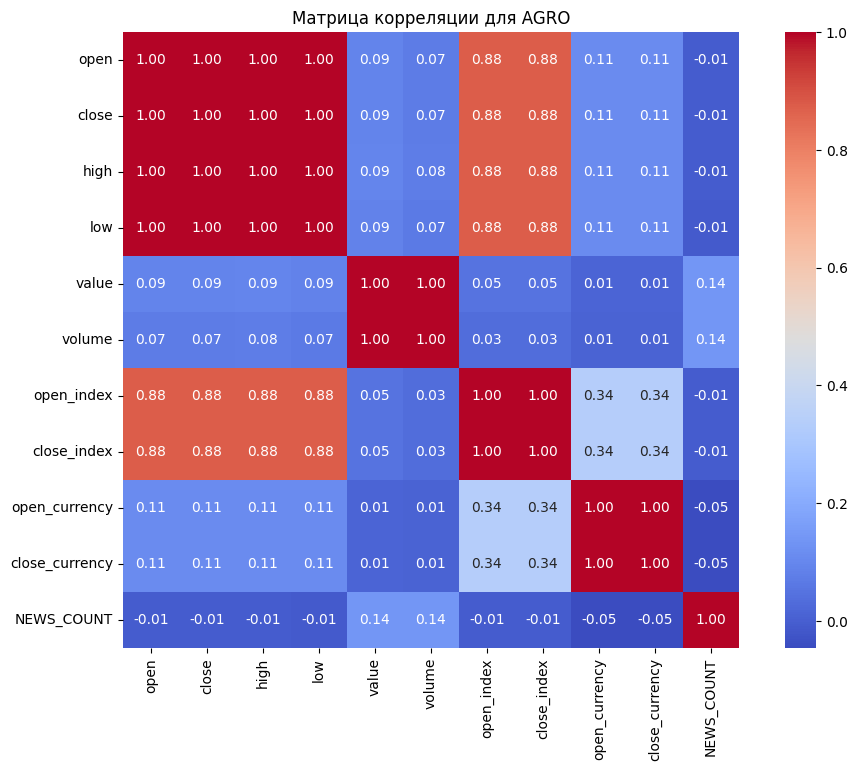

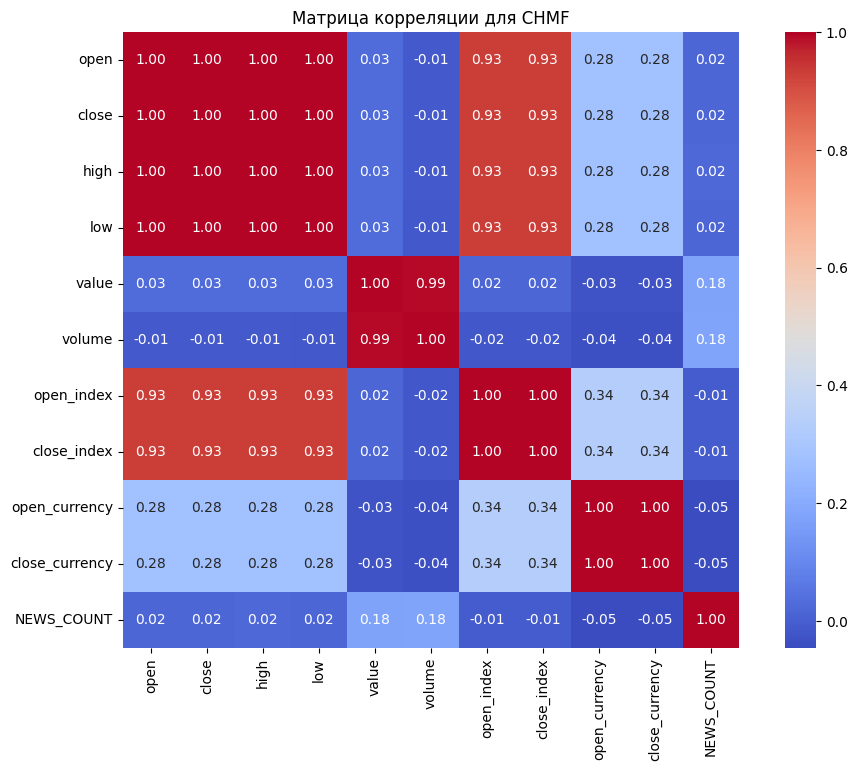

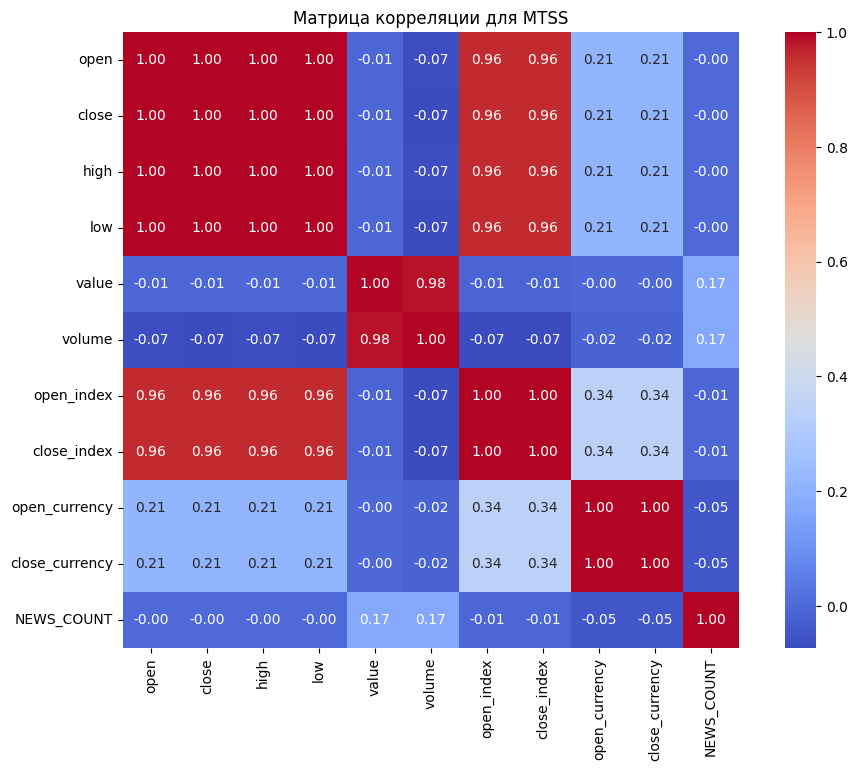

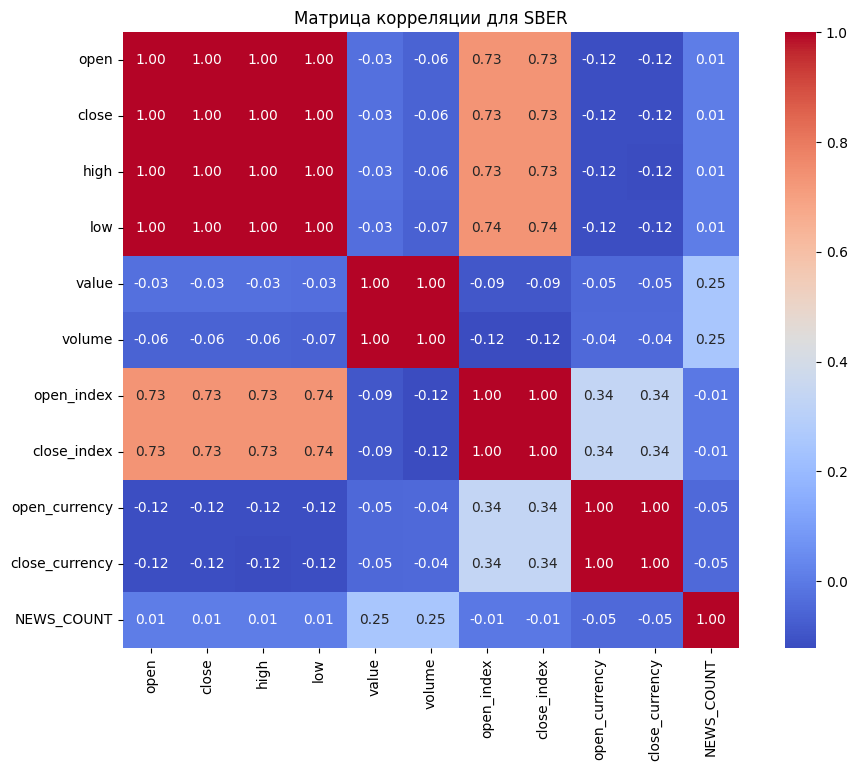

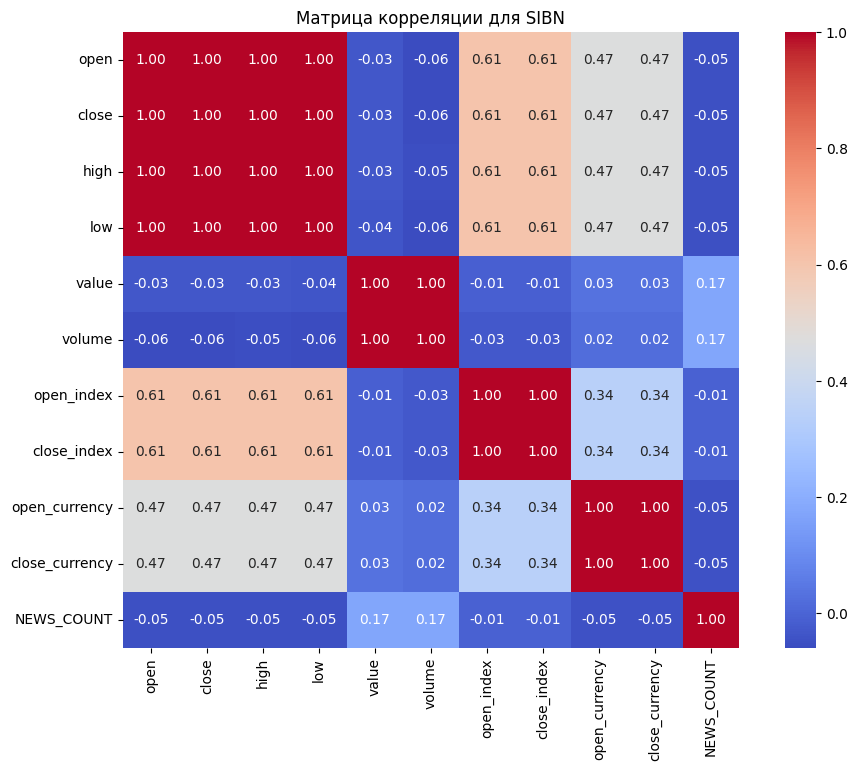

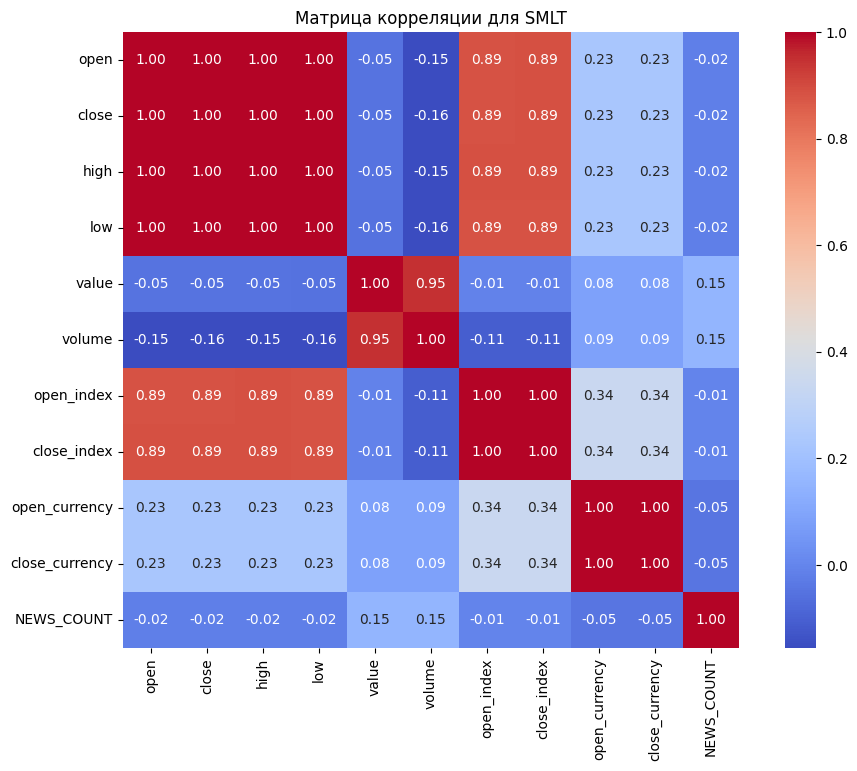

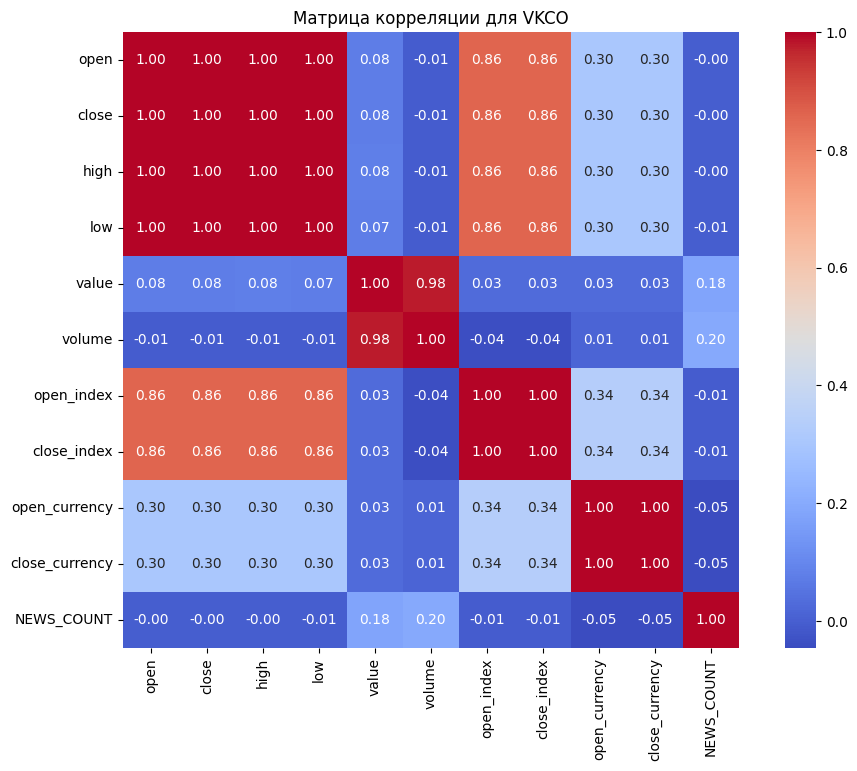

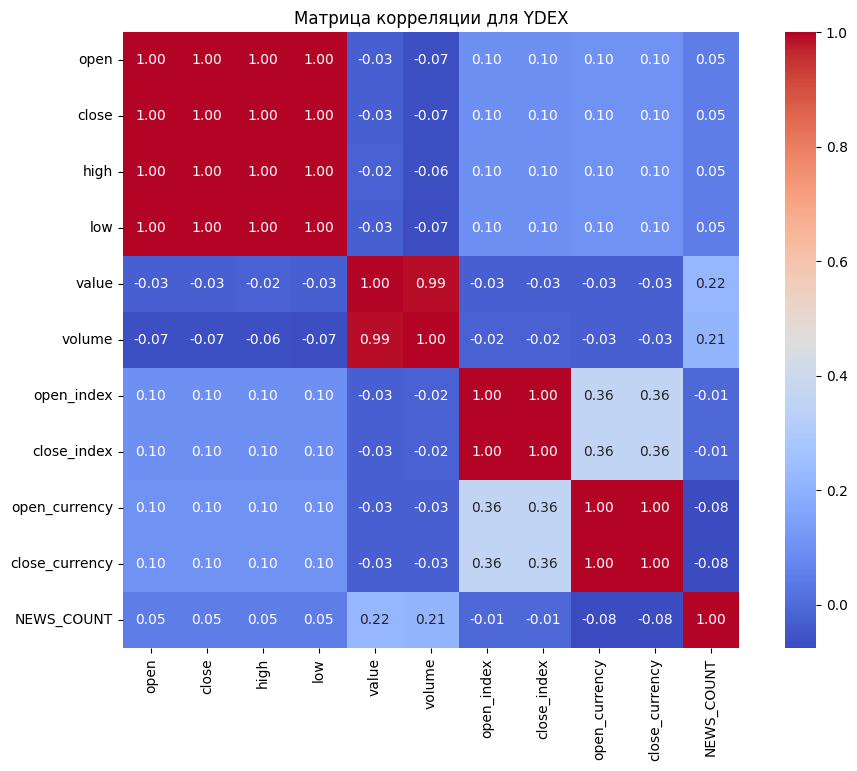

In [37]:
# Список тикеров
tickers = train['ticker'].unique()

# Построение матрицы корреляции отдельно для каждого тикера
for ticker in tickers:
    ticker_df = train[train['ticker'] == ticker].drop(['ticker', 'begin', 'end'], axis=1)
    corr_matrix = ticker_df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title(f'Матрица корреляции для {ticker}')
    plt.show()

# Подготовка данных для обучения модели

In [38]:
# Выводим доплненый датасет
train.head(3)

,ticker,open,close,high,low,value,volume,open_index,close_index,open_currency,close_currency,begin,end,NEWS_COUNT
0,AGRO,1348.8,1344.8,1354.2,1344.6,2669398.4,1981,3099.78,3099.95,12.68,12.6800,2024-01-03 10:00:00,2024-01-03 10:00:59,2.0
1,AGRO,1344.8,1343.6,1344.8,1342.0,1089826.6,811,3100.24,3100.91,12.68,12.6800,2024-01-03 10:00:00,2024-01-03 10:01:59,2.0
2,AGRO,1344.0,1347.8,1348.4,1344.0,199256.6,148,3100.81,3102.54,12.68,12.6795,2024-01-03 10:00:00,2024-01-03 10:02:59,2.0


In [ ]:
# загрузка всех датафреймов и извлечение фичь
import pandas as pd

# Список путей к файлам
file_paths = [
]


dataframes = []

for file_path in file_paths:

    df = pd.read_csv(file_path,sep=';')
    

    df['datetime'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'], format='%d.%m.%Y %H:%M:%S')
    

    df.drop(['DATE', 'TIME'], axis=1, inplace=True)
    

    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['weekday'] = df['datetime'].dt.weekday
    df['hour'] = df['datetime'].dt.hour
    df['minute'] = df['datetime'].dt.minute
    

    dataframes.append(df)


df1 = pd.concat(dataframes, ignore_index=True)


In [39]:
# Приводим сохраненный нами begin к формату с которым работает тг бот
begin_1 = begin_1.apply(lambda x: x.strftime("%Y-%m-%d %H:%M"))

In [40]:
# Заменяем begin в дополненом датасете на тот с которым работает тг бот
train['begin'] = begin_1
train

,ticker,open,close,high,low,value,volume,open_index,close_index,open_currency,close_currency,begin,end,NEWS_COUNT
0,AGRO,1348.8,1344.8,1354.2,1344.6,2669398.4,1981,3099.78,3099.95,12.6800,12.6800,2024-01-03 10:00,2024-01-03 10:00:59,2.0
1,AGRO,1344.8,1343.6,1344.8,1342.0,1089826.6,811,3100.24,3100.91,12.6800,12.6800,2024-01-03 10:01,2024-01-03 10:01:59,2.0
2,AGRO,1344.0,1347.8,1348.4,1344.0,199256.6,148,3100.81,3102.54,12.6800,12.6795,2024-01-03 10:02,2024-01-03 10:02:59,2.0
3,AGRO,1348.8,1347.0,1348.8,1345.2,573627.0,426,3102.66,3104.13,12.6795,12.6785,2024-01-03 10:03,2024-01-03 10:03:59,2.0
4,AGRO,1347.0,1347.6,1347.8,1347.0,327398.2,243,3104.23,3106.06,12.6785,12.6800,2024-01-03 10:04,2024-01-03 10:04:59,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254115,YDEX,4007.5,4007.5,4007.5,4007.5,0.0,0,2829.02,2829.02,13.2400,13.2400,2024-09-30 23:55,2024-09-30 23:55:59,0.0
1254116,YDEX,4007.5,4007.5,4007.5,4007.5,0.0,0,2829.02,2829.02,13.2400,13.2400,2024-09-30 23:56,2024-09-30 23:56:59,0.0
1254117,YDEX,4007.5,4007.5,4007.5,4007.5,0.0,0,2829.02,2829.02,13.2400,13.2400,2024-09-30 23:57,2024-09-30 23:57:59,0.0
1254118,YDEX,4007.5,4007.5,4007.5,4007.5,0.0,0,2829.02,2829.02,13.2400,13.2400,2024-09-30 23:58,2024-09-30 23:58:59,0.0


In [41]:
# Оставляем только необходимые для работы бота признаки и сохраняем датасет для тг бота
train[['ticker', 'open', 'high', 'low', 'volume', 
       'open_index', 'close_index', 'open_currency',
       'close_currency', 'NEWS_COUNT', 'begin']].to_csv('tg_data.csv')

In [42]:
# Приводим тикеры к числовому формату для обучения модели
le_ticker = LabelEncoder()
train['ticker'] = le_ticker.fit_transform(train['ticker'])

Counter(train.ticker)

Counter({0: 159600,
         1: 159600,
         2: 159600,
         3: 159600,
         4: 159600,
         5: 159600,
         6: 159600,
         7: 136920})

In [43]:
# Разделение на X и Y , удаление ненужных данных
X = train[['ticker', 'open', 'high', 'low', 'open_index', 'close_index', 'open_currency', 'close_currency', 'NEWS_COUNT']].values
y = train['close'].values

In [44]:
# вывод основных признаков
X

array([[0.00000e+00, 1.34880e+03, 1.35420e+03, ..., 1.26800e+01,
        1.26800e+01, 2.00000e+00],
       [0.00000e+00, 1.34480e+03, 1.34480e+03, ..., 1.26800e+01,
        1.26800e+01, 2.00000e+00],
       [0.00000e+00, 1.34400e+03, 1.34840e+03, ..., 1.26800e+01,
        1.26795e+01, 2.00000e+00],
       ...,
       [7.00000e+00, 4.00750e+03, 4.00750e+03, ..., 1.32400e+01,
        1.32400e+01, 0.00000e+00],
       [7.00000e+00, 4.00750e+03, 4.00750e+03, ..., 1.32400e+01,
        1.32400e+01, 0.00000e+00],
       [7.00000e+00, 4.00750e+03, 4.00750e+03, ..., 1.32400e+01,
        1.32400e+01, 0.00000e+00]])

In [45]:
# вывод целевого признака
y

array([1344.8, 1343.6, 1347.8, ..., 4007.5, 4007.5, 4007.5])

In [46]:
# Разделяем данные на обучающую и валидационную выборку
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=train.ticker)

In [47]:
# проверим корректность выполнения функции "train_test_split"
X_train

array([[5.00000e+00, 3.86000e+03, 3.86000e+03, ..., 1.22425e+01,
        1.22410e+01, 3.00000e+00],
       [7.00000e+00, 3.85140e+03, 3.85360e+03, ..., 1.27500e+01,
        1.27530e+01, 8.00000e+00],
       [3.00000e+00, 2.92190e+02, 2.92200e+02, ..., 1.19700e+01,
        1.19700e+01, 0.00000e+00],
       ...,
       [4.00000e+00, 7.03850e+02, 7.03950e+02, ..., 1.17660e+01,
        1.17660e+01, 1.00000e+00],
       [7.00000e+00, 4.16100e+03, 4.16150e+03, ..., 1.31265e+01,
        1.31265e+01, 0.00000e+00],
       [1.00000e+00, 1.84460e+03, 1.84460e+03, ..., 1.28690e+01,
        1.28685e+01, 3.00000e+00]])

# Разработка модели

## Тестирование модели машинного обучения: CatBoostRegressor

In [48]:
# Разработаем базовую модель машинного обучения на основе алгоритма "CatBoost"
clf = CatBoostRegressor(
    eval_metric = 'MAE',
    depth=9,
    l2_leaf_reg=2,
    task_type = 'GPU',
    iterations=1200,
    learning_rate=3e-4,
)
clf.fit(X_train,y_train, eval_set=(X_val,y_val), verbose=200)

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 1007.0781743	test: 1007.8710809	best: 1007.8710809 (0)	total: 103ms	remaining: 2m 3s
200:	learn: 948.9349664	test: 949.6864096	best: 949.6864096 (200)	total: 3.55s	remaining: 17.6s
400:	learn: 894.1342774	test: 894.8471917	best: 894.8471917 (400)	total: 7.02s	remaining: 14s
600:	learn: 842.5048321	test: 843.1812586	best: 843.1812586 (600)	total: 10.4s	remaining: 10.4s
800:	learn: 793.8833285	test: 794.5274774	best: 794.5274774 (800)	total: 13.9s	remaining: 6.92s
1000:	learn: 748.0708704	test: 748.6860588	best: 748.6860588 (1000)	total: 17.3s	remaining: 3.45s
1199:	learn: 705.1260166	test: 705.7145409	best: 705.7145409 (1199)	total: 20.8s	remaining: 0us
bestTest = 705.7145409
bestIteration = 1199


### Оценка качества модели машинного обучения

In [49]:
y_pred =  clf.predict(X_val) # предсказываем валидационную выборку    

In [50]:
#Проведем оценку модели
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(mae,mse,r2)

705.7142299329228 763481.380767631 0.511339476527614


По метрикам видно , что модели машинного обучения плохо подходят для решения данной задачи, попробуем использовать нейросеть для решения данной задачи 

In [ ]:

train_df, test_df = train_test_split(df1, test_size=0.4, random_state=42)
X = train_df[['OPEN','MAX','MIN','year','month','day','weekday','hour','minute']].values
y = train_df['CLOSE'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
test_df2 = test_df.sort_values("datetime")[['OPEN','MAX','MIN','year','month','day','weekday','hour','minute']].values
test_df2 = test_df.sort_values("datetime")[['OPEN','MAX','MIN','year','month','day','weekday','hour','minute']].values

In [ ]:
train_df, test_df = train_test_split(df1, test_size=0.4, random_state=42)X = train_df[['OPEN','MAX','MIN','year','month','day','weekday','hour','minute']].values
y = train_df['CLOSE'].values

## Тестирование и обучение нейронной сети

Архитектура "LSTM" специально разработана для обработки данных временных рядов с использованием ячеек памяти, которые сохраняют информацию в течение продолжительных периодов времени. Всвязи с этим мы будем использовать данную архитектуру для решения данной задачи 

In [51]:
# Изменим размерность для корректной работы модели с архитектурой "LSTM"
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

In [52]:
# Иницилизируем модель
model = Sequential()
# model.add(BatchNormalization()) 
model.add(Bidirectional(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]))))
# model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [53]:
# Сохранение наилучшей модели
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='mymodel.keras',
        # Путь по которому нужно сохранить модель
        # Два параметра ниже значат что мы перезапишем
        # текущий чекпоинт в том и только в том случае, когда
        # улучится значение `val_loss`.
        save_best_only=True,
        monitor='val_loss',
        verbose=100)
]

In [54]:
# Обучим модель
model.fit(X_train, y_train, epochs=5, batch_size=64, callbacks=callbacks, validation_data=(X_val, y_val))

Epoch 1/5
15652/15677 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34385.7812
Epoch 1: val_loss improved from inf to 1.13467, saving model to mymodel.keras
15677/15677 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 34336.8828 - val_loss: 1.1347
Epoch 2/5
15637/15677 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7299
Epoch 2: val_loss did not improve from 1.13467
15677/15677 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 3.7293 - val_loss: 1.4598
Epoch 3/5
15633/15677 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5796
Epoch 3: val_loss did not improve from 1.13467
15677/15677 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 3.5789 - val_loss: 1.4665
Epoch 4/5
15630/15677 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2082
Epoch 4: val_loss did not improve from 1.13467
15677/15677 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 3.2083 - val_loss: 32.0905
Epoch 5/5
15650/15677 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3437
Epoch 5: val_loss did not improve from 1.13467
15677/15677 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 3

In [55]:
# Загрузка лучшей модели
model2 = keras.models.load_model('mymodel.keras')

### Оценка качества модели LSTM

In [56]:
y_pred =  model2.predict(X_val) # предсказываем валидационную выборку    

7839/7839 ━━━━━━━━━━━━━━━━━━━━ 6s 722us/step


In [57]:
# Проведем оценку модели
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(mae,mse,r2)

0.5784147635526118 1.1346703761432868 0.9999992737627479


mae = 0.6133439829830647 mse = 1.1215588683391402 r2 = 0.9999992821545914 (Bidirectional, без дропаута, без: 'value', 'volume'.)

mae = 0.5740132811608408 mse = 1.6656722260116341 r2 = 0.9999989347325348 (Bidirectional, без дропаута, без: 'value', 'ticker'.)

mae = 12.281987151661603 mse = 358.8162089370263 r2 = 0.9999526135243581 (Bidirectional, без: 'value', 'ticker'.)

mae = 14.935810277104977 mse = 492.9060670277443 r2 = 0.9999368574187979 (без: 'value', 'ticker'.)

mae = 25.2901999530008 mse = 1356.2137946638468 r2 = 0.9998326442208721 (без 'value'.)

результат lstm на основном этапе(без доп признаков): 41.464420347891306 3151.8504035923193 0.9982174414681426

В целом, результат хороший, особенно с учетом высокого R² = 0.998. Всвязи с этим будем продолжать использовать архитектуру "LSTM" для решения данной задачи. Но проведем подбор основных гиперпараметров с помощью "KerasTuner".

## Проверка гипотезы

В качестве гипотезы рассмотрим обучение нейронной сети без использования новостей. Посмотрим на результаты и оценим насколько гипотеза была оправдана.

In [58]:
# Разделение на X и Y , удаление ненужных данных
X_gip = train[['ticker', 'open', 'high', 'low', 'open_index', 'close_index', 'open_currency', 'close_currency']].values
y_gip = train['close'].values

In [59]:
# вывод основных признаков
X_gip

array([[   0.    , 1348.8   , 1354.2   , ..., 3099.95  ,   12.68  ,
          12.68  ],
       [   0.    , 1344.8   , 1344.8   , ..., 3100.91  ,   12.68  ,
          12.68  ],
       [   0.    , 1344.    , 1348.4   , ..., 3102.54  ,   12.68  ,
          12.6795],
       ...,
       [   7.    , 4007.5   , 4007.5   , ..., 2829.02  ,   13.24  ,
          13.24  ],
       [   7.    , 4007.5   , 4007.5   , ..., 2829.02  ,   13.24  ,
          13.24  ],
       [   7.    , 4007.5   , 4007.5   , ..., 2829.02  ,   13.24  ,
          13.24  ]])

In [60]:
# вывод целевого признака
y_gip

array([1344.8, 1343.6, 1347.8, ..., 4007.5, 4007.5, 4007.5])

In [62]:
# Разделяем данные на обучающую и валидационную выборку
X_train_gip, X_val_gip, y_train_gip, y_val_gip = train_test_split(X_gip, y_gip, test_size=0.2, stratify=train.ticker)

In [63]:
# проверимм корректность выполнения функции "train_test_split"
X_train_gip

array([[6.00000e+00, 6.83600e+02, 6.83800e+02, ..., 3.22864e+03,
        1.26610e+01, 1.26635e+01],
       [6.00000e+00, 6.30000e+02, 6.30400e+02, ..., 3.26748e+03,
        1.27780e+01, 1.27705e+01],
       [2.00000e+00, 1.98500e+02, 1.98500e+02, ..., 2.73433e+03,
        1.17865e+01, 1.17870e+01],
       ...,
       [3.00000e+00, 2.86460e+02, 2.86800e+02, ..., 2.94029e+03,
        1.20110e+01, 1.20100e+01],
       [3.00000e+00, 3.15210e+02, 3.15210e+02, ..., 3.13265e+03,
        1.17515e+01, 1.17420e+01],
       [1.00000e+00, 1.59880e+03, 1.59980e+03, ..., 3.24772e+03,
        1.26590e+01, 1.26560e+01]])

In [64]:
# Изменим размерность для корректной работы модели с архитектурой "LSTM"
X_train_gip = X_train_gip.reshape((X_train_gip.shape[0], 1, X_train_gip.shape[1]))
X_val_gip = X_val_gip.reshape((X_val_gip.shape[0], 1, X_val_gip.shape[1]))

In [74]:
# Иницилизируем модель
model_gip = Sequential()
model_gip.add(Bidirectional(LSTM(50, activation='relu', input_shape=(X_train_gip.shape[1], X_train_gip.shape[2]))))
# model_gip.add(Dropout(0.2))
model_gip.add(Dense(1))
model_gip.compile(optimizer='adam', loss='mse')

In [75]:
# Сохранение наилучшей модели
callbacks_gip = [
    keras.callbacks.ModelCheckpoint(
        filepath='mymodel_gip.keras',
        # Путь по которому нужно сохранить модель
        # Два параметра ниже значат что мы перезапишем
        # текущий чекпоинт в том и только в том случае, когда
        # улучится значение `val_loss`.
        save_best_only=True,
        monitor='val_loss',
        verbose=100)
]

In [76]:
# Обучим модель
model_gip.fit(X_train_gip, y_train_gip, epochs=5, batch_size=64, callbacks=callbacks_gip, validation_data=(X_val_gip, y_val_gip))

Epoch 1/5
15665/15677 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33645.9297
Epoch 1: val_loss improved from inf to 92.70554, saving model to mymodel_gip.keras
15677/15677 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 33622.2305 - val_loss: 92.7055
Epoch 2/5
15640/15677 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 329.9418
Epoch 2: val_loss improved from 92.70554 to 24.55340, saving model to mymodel_gip.keras
15677/15677 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 329.9319 - val_loss: 24.5534
Epoch 3/5
15657/15677 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 313.6148
Epoch 3: val_loss improved from 24.55340 to 14.31811, saving model to mymodel_gip.keras
15677/15677 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 313.6003 - val_loss: 14.3181
Epoch 4/5
15637/15677 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 294.2795
Epoch 4: val_loss improved from 14.31811 to 5.41952, saving model to mymodel_gip.keras
15677/15677 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - loss: 294.2978 - val_loss: 5.4195
Epoch 5/5
15659/15677 ━━━━━━━━━

In [77]:
# Загрузка лучшей модели
model_gip = keras.models.load_model('mymodel_gip.keras')

In [78]:
y_pred_gip =  model_gip.predict(X_val_gip) # предсказываем валидационную выборку    

7839/7839 ━━━━━━━━━━━━━━━━━━━━ 6s 682us/step


In [79]:
# Проведем оценку модели
mae = mean_absolute_error(y_val_gip, y_pred_gip)
mse = mean_squared_error(y_val_gip, y_pred_gip)
r2 = r2_score(y_val_gip, y_pred_gip)
print(mae,mse,r2)

2.110819513140062 5.41952093552816 0.9999965260879801


По метрикам по окончанию обучения мы видим, что результат без использования новостей получился хуже, следовательно гипотеза не опрадала себя.

## Подбор Гиперпараметров

ReLU может улучшить скорость обучения и бороться с затухающим градиентом, особенно на больших данных.

In [80]:
# Проведём обучение нейронной сети с подбором гиперпараметров

def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))) # протестируем с различной выходной размерностью
    # model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1))) # Протестируем с различными значениями Dropout от 0.1 до 0.5
    model.add(Dense(1))
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']), loss='mse') # Проверим работу нейронной сети с различными оптимайзерами
    return model

tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=5,
                     factor=3,
                     directory='my_dir',
                     project_name='lstm_tuning')

# Проведем обучение нейроной сети
tuner.search(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Trial 10 Complete [00h 23m 38s]
val_loss: 1.3818682432174683

Best val_loss So Far: 0.9147233963012695
Total elapsed time: 01h 06m 04s


In [81]:
# В качестве модели будем использовать модель, показавшую себя наилучшим образом по ходу обучения 
best_model = tuner.get_best_models(num_models=1)[0]

In [82]:
best_model.save('best_model.keras')

### Оценка качества модели после подбора гиперпараметров

In [83]:
y_pred =  best_model.predict(X_val) # предсказываем валидационную выборку    

7839/7839 ━━━━━━━━━━━━━━━━━━━━ 8s 945us/step


In [84]:
# Проведем оценку модели
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(mae,mse,r2)

0.45871082067071406 0.9147227801087414 0.9999994145385548


mae = 0.45871082067071406, mse = 0.9147227801087414, r2 =  0.9999994145385548

Метрики основного этапа: mae = 13.720933848587464, mse = 450.6873875854992, r2 =  0.9997466018513086

По метрикам мы видим, что результаты модели улучшились, возьмем ее за окончательное решение

In [ ]:
# вывод сравнения реальной стоимость и предсказанной
plt.figure(figsize=(14, 7))
plt.plot(test_df.sort_values("datetime")['datetime'][-10000:], test_df.sort_values("datetime")['CLOSE'][-10000:], label='real_close')
    
# Линия для предсказаний
plt.plot(test_df.sort_values("datetime")['datetime'][-10000:], y_pred[-10000:], label='predictions', linestyle='-')
# plt.plot(df['date'], df['predictions']-2.3, label='predictions', linestyle='-')

plt.legend(fontsize=25)
plt.grid(True)

# Показать график
plt.show()

# Предсказание

In [53]:
# Создадим функцию для предобработки тестовых данных
def prepare_test_data(test_data, train_data, news_data):
    # Преобразуем дату и время в datetime
    test_data['DATETIME'] = pd.to_datetime(test_data['DATE'] + ' ' + test_data['TIME'])

    # Получаем последние данные для каждого тикера, которые могут быть использованы для теста
    last_rows = train_data[train_data['TICKER'].isin(test_data['TICKER'])]
    last_rows = last_rows[last_rows['DATETIME'] < test_data['DATETIME'].max()].groupby('TICKER').last().reset_index()

    # Объединяем последние данные с тестовой выборкой
    test_data = test_data.merge(last_rows[['TICKER', 'OPEN', 'HIGH', 'LOW', 'VOL']], on='TICKER', how='left')

    # Создание признаков на основе новостей
    news_data['DATETIME'] = pd.to_datetime(news_data['created_at'])#.dt.time
    news_count = news_data.groupby('DATETIME').count()['title'].reset_index()
    news_count.columns = ['DATETIME', 'NEWS_COUNT']

    test_data = pd.merge(test_data, news_count, how='left', on='DATETIME')

    # Заполнение пропущенных значений
    test_data['NEWS_COUNT'].fillna(0, inplace=True)

    return test_data

In [54]:
# применение функции
test = prepare_test_data(test, train, news)

In [ ]:
# График корреляции
plt.figure(figsize=(8, 8))
plt.scatter(test_df['CLOSE'].values, y_pred, color='purple', alpha=0.7) 
plt.title('График корреляции предсказаний и реальных значений (CLOSE)', fontsize=16)
plt.xlabel('Реальные значения (CLOSE)', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.grid(True)
plt.plot([min(test_df['CLOSE'].values), max(test_df['CLOSE'].values)], [min(test_df['CLOSE'].values), max(test_df['CLOSE'].values)], color='gray', linestyle='--') # Линия идеального соответствия
plt.tight_layout()
plt.show()

# Кривые валидации (график обучения)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Ошибка обучения (loss)', color='green')
plt.plot(history.history['val_loss'], label='Ошибка валидации (val_loss)', color='orange')
plt.title('Кривые обучения и валидации', fontsize=16)
plt.xlabel('Эпоха', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
test # вывод тестового датафрейма

,TICKER,DATE,TIME,DATETIME,OPEN,HIGH,LOW,VOL,NEWS_COUNT
0,CHMF,2024-06-07,10:00:00,2024-06-07 10:00:00,1960.0,1960.0,1959.60,305,1.0
1,CHMF,2024-06-07,11:00:00,2024-06-07 11:00:00,1960.0,1960.0,1959.60,305,7.0
2,CHMF,2024-06-07,12:00:00,2024-06-07 12:00:00,1960.0,1960.0,1959.60,305,7.0
3,CHMF,2024-06-07,13:00:00,2024-06-07 13:00:00,1960.0,1960.0,1959.60,305,9.0
4,CHMF,2024-06-07,14:00:00,2024-06-07 14:00:00,1960.0,1960.0,1959.60,305,3.0
...,...,...,...,...,...,...,...,...,...
2125,SBER,2024-06-10,18:00:00,2024-06-10 18:00:00,313.4,313.5,313.33,60460,0.0
2126,SBER,2024-06-10,20:00:00,2024-06-10 20:00:00,313.4,313.5,313.33,60460,0.0
2127,SBER,2024-06-10,21:00:00,2024-06-10 21:00:00,313.4,313.5,313.33,60460,0.0
2128,SBER,2024-06-10,22:00:00,2024-06-10 22:00:00,313.4,313.5,313.33,60460,0.0


In [56]:
# Проверим работоспособность функции в тестовом датафрейме
test["NEWS_COUNT"].sum()

7174.0

In [57]:
# Подготовка тестовой выборки для модели
X_pred = test[['OPEN', 'HIGH', 'LOW', 'VOL', 'NEWS_COUNT']].values
X_pred = X_pred.reshape((X_pred.shape[0], 1, X_pred.shape[1]))

In [58]:
# Предскажем данные
predictions = model2.predict(X_pred)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [59]:
# Сохранение результатов
submission = test[['TICKER', 'DATE', 'TIME']].copy()
submission['CLOSE'] = predictions

In [60]:
# просмотрим submission
submission 

,TICKER,DATE,TIME,CLOSE
0,CHMF,2024-06-07,10:00:00,1975.773438
1,CHMF,2024-06-07,11:00:00,1979.455078
2,CHMF,2024-06-07,12:00:00,1979.455078
3,CHMF,2024-06-07,13:00:00,1980.682007
4,CHMF,2024-06-07,14:00:00,1977.000610
...,...,...,...,...
2125,SBER,2024-06-10,18:00:00,269.672638
2126,SBER,2024-06-10,20:00:00,269.672638
2127,SBER,2024-06-10,21:00:00,269.672638
2128,SBER,2024-06-10,22:00:00,269.672638


In [63]:
# Скачивание результатов
submission.to_csv('submission.csv', index=False, sep=';') 